In [27]:
pip install geopandas

SyntaxError: invalid syntax (1295815619.py, line 1)

In [29]:
pip install jieba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 58.9 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for jieba: filename=jieba-0.42.1-py3-none-any.whl size=19314458 sha256=acc8a1946ca8b19142e5afa8c8380daa1b020f72ed3006e38b9212d2f10ffe93
  Stored in directory: /Users/irenecheung/Library/Caches/pip/wheels/08/a1/a3/5c8ac52cc2f5782ffffc34c95c57c8e5ecb3063dc69541ee7c
Successfully built jieba

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: /opt/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os

def visualize_geojson(file_path):
    gdf = gpd.read_file(file_path)
    gdf.plot()
    plt.title("GeoJSON Visualization")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()


def convert_geojson_to_csv(file_path):
    gdf = gpd.read_file(file_path)
    csv_file_path = os.path.splitext(file_path)[0] + '.csv'
    gdf.to_csv(csv_file_path, index=False)
    print(f"CSV file saved to: {csv_file_path}")


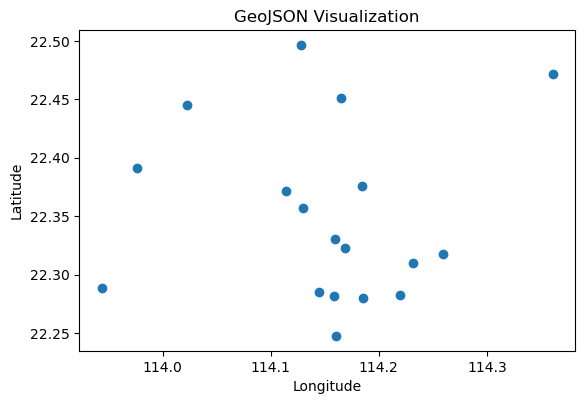

CSV file saved to: PastPC_converted.csv


In [49]:
visualize_geojson('PastPC_converted.json')
convert_geojson_to_csv('PastPC_converted.json')

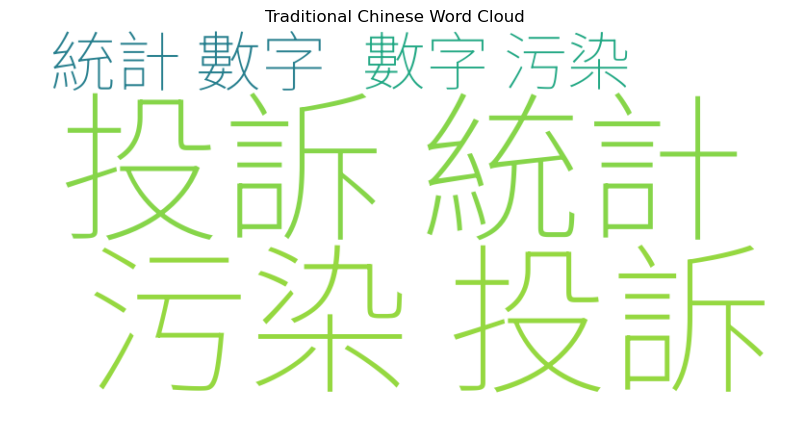

In [51]:
#ignore this for now

import pandas as pd
import jieba
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Load your CSV file
complaints_df = pd.read_csv('EPDPCS19.csv')

# Combine all text from the 'DATASET_TC' column
text = ' '.join(complaints_df['DATASET_TC'].dropna().astype(str))

custom_words = ['']
for word in custom_words:
    jieba.add_word(word)

seg_list = jieba.cut(text, cut_all=False)
segmented_text = ' '.join(seg_list)

update_stopwords = {'的', '了', '和', '是', '在', '也', '有', '與', '及', '或', '不', '就', '都', '而'}

stopwords = set(STOPWORDS)
stopwords.update(update_stopwords)

# Path to Traditional Chinese font (make sure this file exists)
font_path = 'NotoSansTC-VariableFont_wght.ttf'  # Replace with actual path if needed

# Generate word cloud
wordcloud = WordCloud(
    font_path=font_path,
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords
).generate(segmented_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Traditional Chinese Word Cloud')
plt.show()